In [19]:
from __future__ import absolute_import,division,print_function

import tensorflow as tf
import numpy as np

In [20]:
tf.__version__

'2.8.0'

In [2]:
# MINIST dataset parameters
num_classes = 10   # 0 to 9 digits
num_features = 784 # 28*28

# Training parameters
leaning_rate = 0.01
train_steps = 1000
batch_size = 256
display_step = 50

In [6]:
# Prepare MINIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32
x_train,x_test = np.array(x_train,np.float32),np.array(x_test,np.float32)
# Flatten images to 1-D vector of 784 features(28*28)
x_train,x_test = x_train.reshape([-1,num_features]),x_test.reshape([-1,num_features])
# Normalize images value from [0,255] to [0,1]
x_train,x_test = x_train/255.,x_test/255.

In [ ]:
# Use tf.data API to shuffle and batch data
train_data = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_data = train_data.repeat().shuffle(5000).batch((batch_size)).prefetch(1)

In [8]:
# Weight of shape[784,10], the 28*28 image features and total number of classes
W = tf.Variable(tf.ones([num_features,num_classes]),name="weight")
# Bias fo shape[10],the total number of classes
b = tf.Variable(tf.zeros([num_classes]),name="bias")

# Logistic regression (Wx+b)
def logistic_regression(x):
    #Apply to softmax to normalize the logits to a probability distribution
    return tf.nn.softmax(tf.matmul(x,W)+b)

# Cross-Entropy loss function
def cross_entropy(y_pred,y_true):
    y_true = tf.one_hot(y_true,depth=num_classes)
    y_pred = tf.clip_by_value(y_pred,1e-9,1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred),1))

#Accuracy metric
def accuracy(y_pred,y_true):
    # Predicted class is the index of highest score in prediction vector
    correcr_prediction = tf.equal(tf.argmax(y_pred,1),tf.cast(y_true,tf.int64))
    return tf.reduce_mean(tf.cast(correcr_prediction,tf.float32))

optimizer = tf.optimizers.SGD(leaning_rate)

In [9]:
#Optimization process
def run_optimation(x,y):
    #Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred,y)
    #Compute gradients
    gradients = g.gradient(loss,[W,b])
    #Update W and b following gradients
    optimizer.apply_gradients(zip(gradients,[W,b]))

In [10]:
for step,(batch_x,batch_y) in enumerate(train_data.take(train_steps),1):
    run_optimation(batch_x,batch_y)

    if step%display_step==0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred,batch_y)
        acc = accuracy(pred,batch_y)
        print('strp: %i, loss: %f, accuracy: %f'%(step,loss,acc))

2022-03-18 17:05:46.597797: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


strp: 50, loss: 1.858646, accuracy: 0.753906
strp: 100, loss: 1.528719, accuracy: 0.789062
strp: 150, loss: 1.362602, accuracy: 0.808594
strp: 200, loss: 1.213817, accuracy: 0.757812
strp: 250, loss: 1.037258, accuracy: 0.820312
strp: 300, loss: 0.957408, accuracy: 0.824219
strp: 350, loss: 0.957840, accuracy: 0.828125
strp: 400, loss: 0.922535, accuracy: 0.808594
strp: 450, loss: 0.803293, accuracy: 0.867188
strp: 500, loss: 0.808286, accuracy: 0.824219
strp: 550, loss: 0.741705, accuracy: 0.839844
strp: 600, loss: 0.709884, accuracy: 0.855469
strp: 650, loss: 0.786293, accuracy: 0.820312
strp: 700, loss: 0.658282, accuracy: 0.878906
strp: 750, loss: 0.696682, accuracy: 0.855469
strp: 800, loss: 0.756981, accuracy: 0.820312
strp: 850, loss: 0.635660, accuracy: 0.843750
strp: 900, loss: 0.632496, accuracy: 0.859375
strp: 950, loss: 0.604988, accuracy: 0.859375
strp: 1000, loss: 0.534821, accuracy: 0.898438


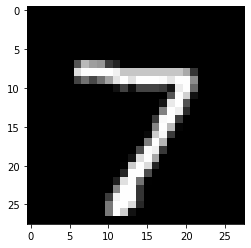

Model prediction: 7


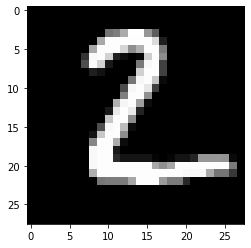

Model prediction: 2


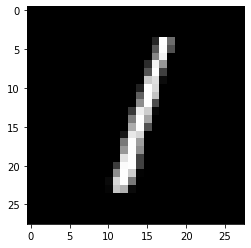

Model prediction: 1


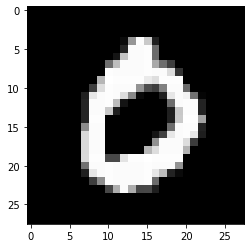

Model prediction: 0


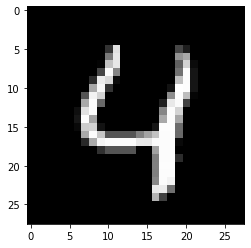

Model prediction: 4


In [12]:
import matplotlib.pyplot as plt

# Predict 5 images from validation set
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

#Display image and  model prediction
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i],[28,28]),cmap='gray')
    plt.show()
    print("Model prediction: %i"%np.argmax(predictions.numpy()[i]))